# STANDALONE STUDY

## **SYSTEM DESCRIPTION**
-------------------------

In [5]:
from IPython.display import display, Markdown
display(Markdown(filename='double_wishbone.md'))

# DOUBLE WISHBONE DIRECT ACTING

**STANDALONE TOPOLOGY**

------------------------------------------------

### **Summary**

A **double wishbone** mechanism is a type of  independent suspension mechanism used for automotive. It controls the motion of the wheel assembly via two control arms that are connected to the chassis from one end and to the wheel-carrier on the other end, which resembles a **four-bar linkage**, with the chassis being the ground, and the wheel-carrier being the coupler. The wheel-carrier is connected also to the chassis via a tie-rod that constrains the steering of the wheel-assembly as well. 

This kinematic chain is augmented with a another simple chain that controls the vertical motion of the wheel-assembly, this simple chain can be a direct-acting coil-over that is connected to either one of the control arms and the chassis, or can be a rocker-push/pull rod mechanism that is connected to the coil-over.

![Figure 1 - System Layout](double_wishbone.png)

*Figure 1 - Double Wishbone Layout*

--------------------------------------

### **Topology Layout**

The mechanism consists of 8 Bodies + 1 Ground. Therefore, total system coordinates -including the ground- is $n=n_b\times7 = 9\times7 = 63$, where $n_b$ is the total number of bodies. [^1]

The list of bodies is given below:

- Upper Control Arm **(UCA)**.
- Lower Control Arm **(LCA)**.
- Upright.
- Wheel Hub.
- Tie-Rod.
- CoilOver P1.
- CoilOver P2.
- Steering Rack.

The system connectivity is given in the table below.

<center>

| Joint Name      | Body i        | Body j      |  Joint Type   | $n_c$ |
| :-------------- | :------------ | :---------- | :-----------: | ----: |
| UCA Outer Joint | UCA           | Upright     |   Spherical   |     3 |
| LCA Outer Joint | LCA           | Upright     |   Spherical   |     3 |
| Tie-Rod Outer   | Tie-Rod       | Upright     |   Spherical   |     3 |
| UCA-Chassis     | UCA           | Chassis     |   Revolute    |     5 |
| LCA-Chassis     | LCA           | Chassis     |   Revolute    |     5 |
| Hub Bearing     | Wheel-Hub     | Upright     |   Revolute    |     5 |
| Tie-Rod Inner   | Tie-Rod       | Chassis     |   Universal   |     4 |
| CoilOver Top    | CoilOver P1   | Chassis     |   Universal   |     4 |
| CoilOver Bottom | CoilOver P2   | UCA         |   Universal   |     4 |
| CoilOver Cyl    | CoilOver P1   | CoilOver P2 |  Cylindrical  |     4 |
| Rack-Chassis    | Steering Rack | Chassis     | Translational |     5 |
| **Total**       |               |             |               |    45 |

</center>

</br>

Hence, the total number of constraints equations is:
$$ n_{c} = n_{c_j} + n_{c_p} + n_{c_g} = 45 + (9\times 1) + 6 = 60 $$

where:
* $n_{c_j}$ is the joints constraints.
* $n_{c_p}$ is the euler-parameters normalization constraints.
* $n_{c_g}$ is the ground constraints.

Therefore, the resulting **DOF** is:
$$ n - n_c = 63 - 60 = 3 $$

which can be interpreted in a convenient way that one DOF is the rotational motion of the wheel, one is the vertical motion and one for the rack travel.

------------------------------------------------------
<br/>

[^1]: The tool uses [euler-parameters](https://en.wikibooks.org/wiki/Multibody_Mechanics/Euler_Parameters) -which is a 4D unit quaternion- to represents bodies orientation in space. This makes the generalized coordinates used to fully define a body in space to be **7,** instead of **6**, it also adds an algebraic equation to the constraints that ensures the unity/normalization of the body quaternion. This is an important remark as the calculations of the degrees-of-freedom depends on it.



-------------------
-------------------

## Environment Setup
--------------------

### Colab Session
*Run if in a Colab Session Only!*

#### Setting-up Colab Virtual Machine
This will install the needed modules into the Virtual Machine dedicated for the running notebook session.

In [ ]:
!pip install uraeus.smbd

Creating a new directory, `/uraeus_smbd`, where we can store the model files and results.

In [ ]:
import os

os.mkdir('uraeus_smbd')
os.chdir('uraeus_smbd')

#### Rendering SymPy in Colab
Rendering SymPy equations in Colab requires the MathJax javascript library to be available within each cell output. The following defines an execution hook that loads it automatically each time you execute a cell.

In [ ]:
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

---------------------------------------------------------------

### Local Session
*Run if on your Local Machine!*</br>

Creating Project Directories

In [1]:
from uraeus.smbd.systems import standalone_project

In [2]:
project = standalone_project()
project.create()

---------------------------------------------------------------
---------------------------------------------------------------

## SYSTEM MODELING

---------------------------------------------------------------
---------------------------------------------------------------

## **CODE GENERATION**
----------------------

This step aims to create a valid code that can be used for numerical simulation. We will use the ***python code generators*** to create a valid numerical simulation environment in python.</br>
Theoretically, the symbolic environment is uncoupled from the simulation environment, which opens the door to create various simulation environments that can be in any language.

### Generating Python Numerical Environment

In [1]:
from uraeus.nmbd.python import standalone_project

Failed importing compiled Cython matrices!
Falling back to numba mode.


In [2]:
# Creating the needed directories structure for the source code.
py_project = standalone_project(stpl_file='symenv\dwb_direct_acting.stpl', parent_dir='')
py_project.create_dirs()

# Generating the source code.
py_project.write_topology_code()

File full path : numenv\python\src\dwb_direct_acting.py


## **PYTHON NUMERICAL SIMULATION**
---------------------------

The **numerical simulation** step is also a straight forward one. We start by importing helper libraries like **numpy** and **pandas**, then we import the ```multibody_system``` class and the ```simulation``` class that will be used to create a numerical system and a simulation instance respectively. And finally we import the generated code files from the previous step.

The steps then can be summarized as follows:
1. Create a numerical model instance by passing the generated topology code to the ```multibody_system``` class.
2. Make the configuration of that instance refers to the generated configuration code.
3. Setting the numerical data of the configuration.
4. Setting the **user-defined functions** that will be used for the actuators/forces.
5. Creating a **simulation instance**, set the desired time-sampling and run the simulation.
6. Plotting the results.

###  Imports

In [3]:
import numpy as np
from uraeus.nmbd.python import multibody_system, simulation, configuration

In [4]:
# Importing the generated modules/souce-code of the model.
from numenv.python.src import dwb_direct_acting

### Creating Numerical Model

In [5]:
num_model  = multibody_system(dwb_direct_acting)

num_config = configuration('base')
num_config.construct_from_json('symenv\dwb_direct_acting_cfg.json')

num_model.topology.config = num_config

### Setting Configuration Numerical Data

In [6]:
# Specifying the Numerical Configuration of the System.
# ====================================================

# Tire Radius
TR = 265

# Upper Control Arms
num_config.hpr_ucaf.flat[:] = [-127, 350, 142 + TR]
num_config.hpr_ucar.flat[:] = [ 103, 350, 128 + TR]
num_config.hpr_ucao.flat[:] = [ -12, 589, 127 + TR]

# Lower Control Arms
num_config.hpr_lcaf.flat[:] = [-108, 345, -80 + TR]
num_config.hpr_lcar.flat[:] = [ 122, 345, -80 + TR]
num_config.hpr_lcao.flat[:] = [   7, 620, -89 + TR]

# Tie-Rod
num_config.hpr_tri.flat[:] = [-156, 317, 186 + TR]
num_config.hpr_tro.flat[:] = [-156, 454, 178 + TR]


# Strut
num_config.hpr_strut_chassis.flat[:] = [-15, 500, 540 + TR]
num_config.hpr_strut_arm.flat[:]  = [-12, 491, 104 + TR]

# Strut-Force element points' of application and Free-Length
num_config.pt1_far_strut = num_config.hpr_strut_chassis
num_config.pt2_far_strut = num_config.hpr_strut_arm
num_config.far_strut_FL = 400


# Wheel-Hub
num_config.hpr_wc.flat[:]  = [0, 650, 0 + TR]
num_config.hpr_wc1.flat[:] = [0, 700, 0 + TR]
num_config.hpr_wc2.flat[:] = [0, 600, 0 + TR]

# x, y and z vectors
num_config.vcs_x.flat[:] = [1, 0, 0]
num_config.vcs_y.flat[:] = [0, 1, 0]
num_config.vcs_z.flat[:] = [0, 0, 1]

# Geometry Scalars
num_config.s_hub_radius  = TR
num_config.s_links_ro    = 8
num_config.s_strut_inner = 15
num_config.s_strut_outer = 22
num_config.s_thickness   = 8

# vertical travel actuation points.
num_config.pt1_mcr_wheel_travel.flat[:] = [0, 600, 0]
num_config.pt2_mcr_wheel_travel.flat[:] = [0, 600, 0]

# Saving the data to a csv file.
#num_config.to_csv('config_inputs')

In [7]:
num_config.assemble()

### Setting User Functions.

#### Actuators
Here we set the actuation functions of the system actuators.

In [8]:
# Vertical travel actuation function
num_config.UF_mcr_wheel_travel = lambda t : 70*np.sin(t)
num_config.UF_mcl_wheel_travel = lambda t : 70*np.sin(t)

# Wheel spin actuation function
num_config.UF_mcr_wheel_lock = lambda t : 0
num_config.UF_mcl_wheel_lock = lambda t : 0

#### Forces
Here we set the actuation functions of the system forces.

In [9]:
# Creating a coilover class that represents out strut element.
class coilover(object):
    
    def __init__(self, k, c):
        self.k = k * 1e6 # convert from N.mm to (gm.mm/s2).mm
        self.c = c * 1e6 # convert from N.mm/s to (gm.mm/s2).mm/s
        
    def spring_force(self, x):
        force = self.k * x if x>0 else 0
        return force
    
    def damping_force(self, v):
        force = self.c * v
        return force

In [10]:
strut_force = coilover(100, 12)

num_config.UF_far_strut_Fs = strut_force.spring_force
num_config.UF_far_strut_Fd = strut_force.damping_force

### Assembling the numerical configuration.
Here, we pass the numerical inputs instance ```num_inputs``` to the ```assemble()``` method of the ```num_config``` instance of our model.

### Creating Simulation Instance

A simulation instance takes in three arguments, the simulation ```name```, the numerical ```model``` and the simulation ```typ```. The simulation ```typ``` argument should be either *kds* for kinematically driven systems or *dds* for dynamically driven systems. For our case, the system is kinematically fully constrained, and therefore we will set the ```typ``` as *kds*.

In [11]:
sim = simulation('sim', num_model, 'kds')
sim.set_time_array(2*np.pi, 1e-2)
sim.solve()


Running System Kinematic Analysis:
[=========================] 100%, (628/628) steps. ET = 12.45 (s)



We then save the simulation results if needed.

In [ ]:
sim.save_results('results', 'vertical_travel_70mm')

### Plotting the Results

#### System Configuration Plots

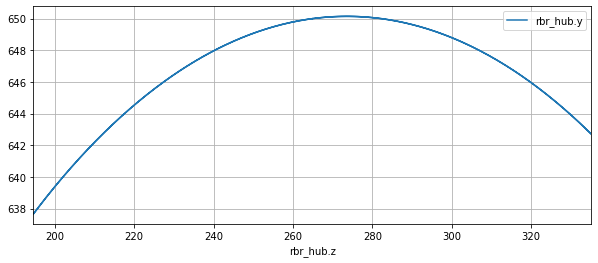

In [12]:
sim.soln.pos_dataframe.plot(x='rbr_hub.z', y='rbr_hub.y', grid=True, figsize=(10,4))


### Evaluating System Reactions

Here we take the simulation a step further and evaluate the reactions resulted due the imposed constraints, either by joints or motion actuators.

In [13]:
sim.eval_reactions()


Evaluating System Constraints' Forces.
[=========================] 100%, (629/629) steps. ET = 5.128 (s)